#**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 200)

#**Reading the data**


In [ ]:
df = pd.read_csv("loan.csv")

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(39717, 111)

In [ ]:
pd.set_option('display.max_info_columns', 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#**Data Cleaning**


### **Inspect the null values**

In [ ]:
null_per = (df.isnull().sum()/len(df.index))*100
null_per[null_per>=50]

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

Many features have 100% null values; These features mostly regard for candidates' bank account(s) history like number of accounts opened since x months for different types of accounts.


In [ ]:
#dropping columns whose missing values is 50% or higher

df.drop(list(null_per[null_per>=50].index),axis=1,inplace=True)
print("Number of features in dataframe after dropping features with high frequency null values: ", df.columns.shape[0])

Number of features in dataframe after dropping features with high frequency null values:  54


###**Inspect Duplicate records**

In [231]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,total_acc


No duplicate records found in the dataset

### **Handling unnecessary rows/columns**


In [ ]:
#dropping irrelevant columns
df.drop(['url'],axis=1,inplace=True)
df.columns.shape

(53,)

In [ ]:
for col in df.columns:
  print(col,df[col].value_counts(dropna=True).count())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
desc 26527
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [ ]:
drop_col = [col for col in df.columns if (df[col].value_counts(dropna=True).count()==1)]
print("\nColumns with only 1 unique value, which doesn't give much insight, so let's drop: ",drop_col)


Columns with only 1 unique value, which doesn't give much insight, so let's drop:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [ ]:
df.drop(drop_col,axis=1,inplace=True)

In [ ]:
print("Number of features after handling unnecessary columns: ", df.shape[1])

Number of features after handling unnecessary columns:  44


### **Interpreting missing values**


In [ ]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc 

In [ ]:
df.isna().any()[lambda x: x].index

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df[['emp_title', 'emp_length', 'desc', 'title', 'revol_util','last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']].head()

,emp_title,emp_length,desc,title,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.70%,Jan-15,May-16,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.40%,Apr-13,Sep-13,0.0
2,NaN,10+ years,NaN,real estate business,98.50%,Jun-14,May-16,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,21%,Jan-15,Apr-16,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,53.90%,May-16,May-16,0.0


In [ ]:
df['emp_length'].value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

**Let's analyze the features with missing values against target variable**

1. Employment Length (colname = emp_length)

In [ ]:
emp_length_missing = df[df['emp_length'].isna()]
emp_length_available = df[~df['emp_length'].isna()]

print("Missing count of emp_length: ",emp_length_missing.shape[0]," i.e. around",str(round(emp_length_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of emp_length: ",emp_length_available.shape[0]," i.e. around",str(round(emp_length_available.shape[0]/df.shape[0]*100))+"%")

Missing count of emp_length:  1075  i.e. around 3%
Available count of emp_length:  38642  i.e. around 97%


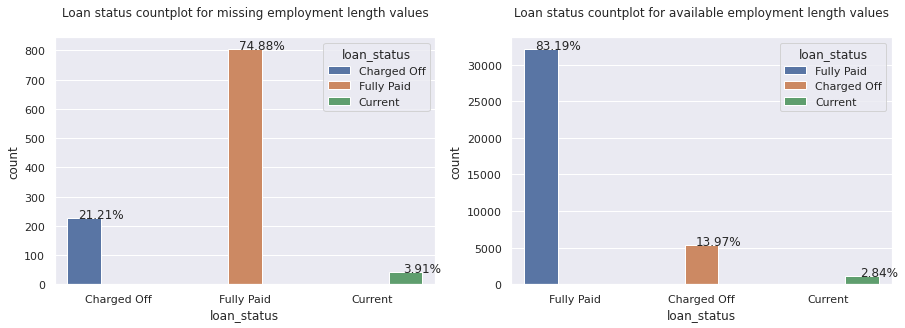

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing employment length values\n")
ax=sns.countplot(data=emp_length_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_length_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=emp_length_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available employment length values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_length_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Customers whose data has employment length missing in the data has significantly higher chances of defaulting than those whose employment length is present 7-8%


2. Employment Title (colname = emp_title)

In [ ]:
emp_title_missing = df[df['emp_title'].isna()]
emp_title_available = df[~df['emp_title'].isna()]

print("Missing count of emp_title: ",emp_title_missing.shape[0]," i.e. around",str(round(emp_title_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of emp_title: ",emp_title_available.shape[0]," i.e. around",str(round(emp_title_available.shape[0]/df.shape[0]*100))+"%")

Missing count of emp_title:  2459  i.e. around 6%
Available count of emp_title:  37258  i.e. around 94%


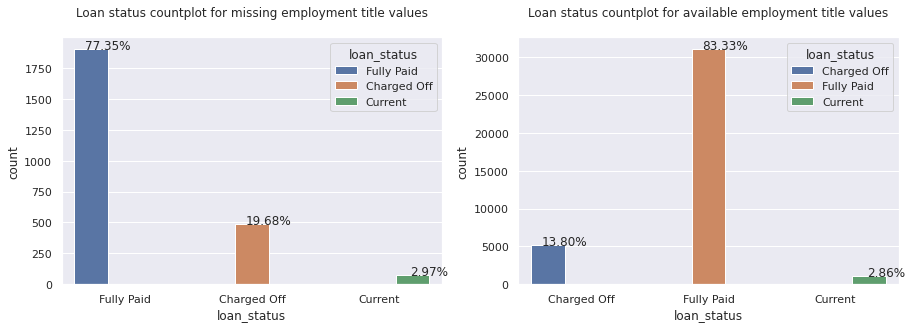

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing employment title values\n")
ax=sns.countplot(data=emp_title_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_title_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=emp_title_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available employment title values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_title_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Customers whose data has employment length missing in the data has  higher chances of defaulting than those whose employment length is present by 6%.


3. Description of why customer needs loan (colname = desc)

In [ ]:
desc_missing = df[df['desc'].isna()]
desc_available = df[~df['desc'].isna()]

print("Missing count of description: ",desc_missing.shape[0]," i.e. around",str(round(desc_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of description: ",desc_available.shape[0]," i.e. around",str(round(desc_available.shape[0]/df.shape[0]*100))+"%")

Missing count of description:  12940  i.e. around 33%
Available count of description:  26777  i.e. around 67%


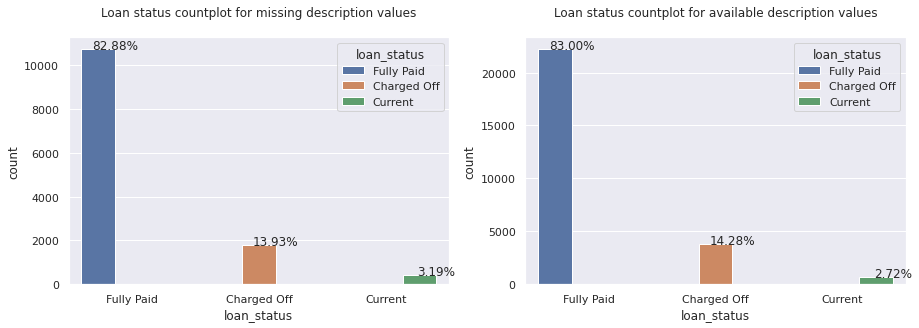

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing description values\n")
ax=sns.countplot(data=desc_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(desc_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=desc_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available description values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(desc_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Missing values of description does not impact the defaulting case.

4. public record bankruptcies 

In [ ]:
pub_rec_bankruptcies_missing = df[df['pub_rec_bankruptcies'].isna()]
pub_rec_bankruptcies_available = df[~df['pub_rec_bankruptcies'].isna()]

print("Missing count of pub_rec_bankruptcies_missing: ",pub_rec_bankruptcies_missing.shape[0]," i.e. around",str(round(pub_rec_bankruptcies_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of pub_rec_bankruptcies_available: ",pub_rec_bankruptcies_available.shape[0]," i.e. around",str(round(pub_rec_bankruptcies_available.shape[0]/df.shape[0]*100))+"%")

Missing count of pub_rec_bankruptcies_missing:  697  i.e. around 2%
Available count of pub_rec_bankruptcies_available:  39020  i.e. around 98%


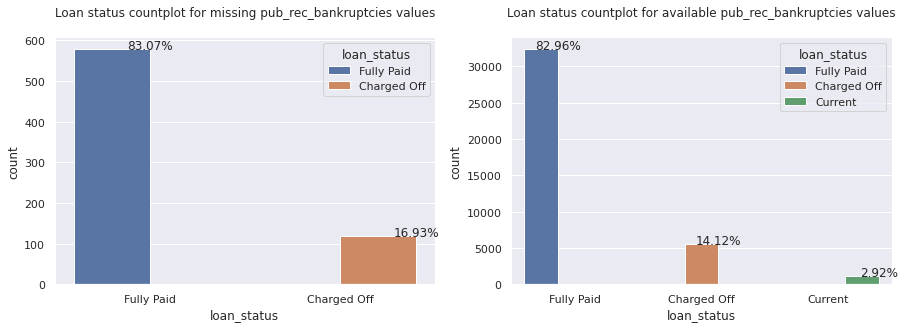

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing pub_rec_bankruptcies values\n")
ax=sns.countplot(data=pub_rec_bankruptcies_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(pub_rec_bankruptcies_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=pub_rec_bankruptcies_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available pub_rec_bankruptcies values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(pub_rec_bankruptcies_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Missing values of public record bankruptcies  does not impact the defaulting case.

### **Standardizing the values and fixing data types**


In [ ]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0


In [ ]:
df['term'] = df['term'].str.strip("months").astype('int')
print(df['term'].head(3))

0    36
1    60
2    36
Name: term, dtype: int64


In [ ]:
df['int_rate'] = df['int_rate'].str.strip("%").astype('float')
print(df['int_rate'].head(3))

0    10.65
1    15.27
2    15.96
Name: int_rate, dtype: float64


In [ ]:
df['emp_length'] = df['emp_length'].apply(lambda x : x if pd.isna(x) else x.replace("< ","").replace("+","")).str.split(" ", n = 1, expand = True)[0]
df['emp_length'] = df['emp_length'].apply(lambda x : x if pd.isna(x) else float(x))
print(df['emp_length'].head(3))

0    10.0
1     1.0
2    10.0
Name: emp_length, dtype: float64


In [ ]:
df['emp_length'].value_counts()

10.0    8879
1.0     7823
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [ ]:
df['revol_util'] = df['revol_util'].apply(lambda x : x if pd.isna(x) else float(x.strip("%")))
print(df['revol_util'].head(3))

0    83.7
1     9.4
2    98.5
Name: revol_util, dtype: float64


In [ ]:
import datetime as dt
df['issue_d'] = df['issue_d'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['issue_d'].head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['earliest_cr_line'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [ ]:
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['last_pymnt_d'].head(3)

0   2015-01-01
1   2013-04-01
2   2014-06-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [ ]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['last_credit_pull_d'].head(3)

0   2016-05-01
1   2013-09-01
2   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]

###**Filtering data**

1. Let's exclude the features that account as customer behavioral variables as they are not available at the time of approval/rejecting loan. 
2. Let's also remove the features that describe current ongoing loans

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
customer_behavioral_col = ['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'] 

In [ ]:
df.drop(customer_behavioral_col,axis=1,inplace=True)

In [ ]:
print("Number of features after filtering the data: ", df.shape[1])

Number of features after filtering the data:  24


#**Univriate Analysis**

In [ ]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,total_acc
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,5.092050,6.896893e+04,13.315130,22.088828
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.408338,6.379377e+04,6.678594,11.401709
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,2.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,13.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,20.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,29.000000
90%,1.007009e+06,1.232878e+06,22000.000000,21000.000000,20000.000000,60.000000,16.890000,622.952000,10.000000,1.160000e+05,22.330000,38.000000
95%,1.039966e+06,1.269462e+06,25000.000000,25000.000000,24736.572264,60.000000,18.540000,762.996000,10.000000,1.420000e+05,23.840000,43.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,90.000000


We see outliers in columns such as annual_inc and total_acc.

In [ ]:
import numpy as np
df.describe(include=[np.object])

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,desc,purpose,title,zip_code,addr_state
count,39717,39717,37258,39717,39717,39717,26777,39717,39706,39717,39717
unique,7,35,28820,5,3,3,26527,14,19615,823,50
top,B,B3,US Army,RENT,Not Verified,Fully Paid,,debt_consolidation,Debt Consolidation,100xx,CA
freq,12020,2917,134,18899,16921,32950,210,18641,2184,597,7099


**Here, 'top' shows the mode of the feature and 'freq' gives frequency of the mode for that feature.**





RENT        0.475842
MORTGAGE    0.444621
OWN         0.076995
OTHER       0.002467
NONE        0.000076
Name: home_ownership, dtype: float64 



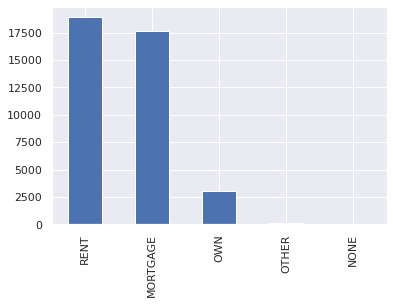

In [ ]:
print(df['home_ownership'].value_counts(dropna=False,normalize=True),"\n")
df['home_ownership'].value_counts(dropna=False).plot(kind='bar')

Majority of customers are either Renting house or are on mortage.

Not Verified       0.426039
Verified           0.322507
Source Verified    0.251454
Name: verification_status, dtype: float64 



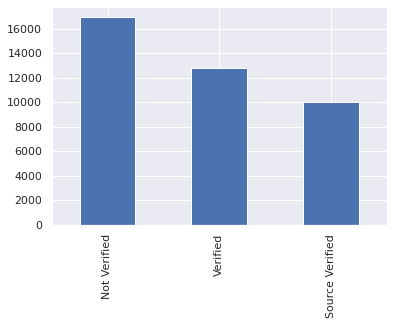

In [ ]:
print(df['verification_status'].value_counts(dropna=False,normalize=True),"\n")
df['verification_status'].value_counts(dropna=False).plot(kind='bar')

Background check of around 42.6% of loan applicants' has not been done. 

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64 



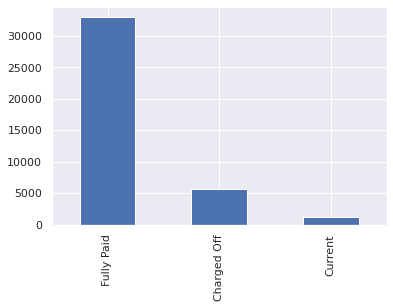

In [ ]:
print(df['loan_status'].value_counts(dropna=False,normalize=True),"\n")
df['loan_status'].value_counts(dropna=False).plot(kind='bar')

Around 82.96% of loans have been fully paid. 14.17% has been defaulted. And 2.8% loans are ongoing.

debt_consolidation    0.469346
credit_card           0.129164
other                 0.100536
home_improvement      0.074930
major_purchase        0.055065
small_business        0.046026
car                   0.039001
wedding               0.023844
medical               0.017448
moving                0.014679
vacation              0.009593
house                 0.009593
educational           0.008183
renewable_energy      0.002593
Name: purpose, dtype: float64 



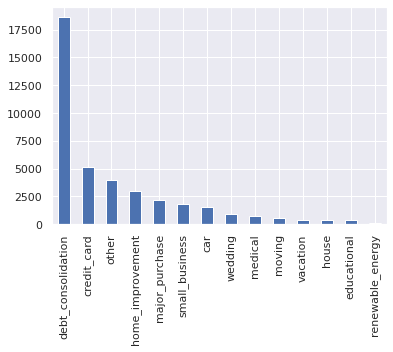

In [ ]:
print(df['purpose'].value_counts(dropna=False,normalize=True),"\n")
df['purpose'].value_counts(dropna=False).plot(kind='bar')

Around 46% of customers are applying for loan for debt_consolidation.

In [ ]:
charged_off_df = df[df['loan_status']=='Charged Off']
fully_paid_df = df[df['loan_status']=='Fully Paid']

B    0.302641
A    0.253921
C    0.203893
D    0.133620
E    0.071556
F    0.026412
G    0.007956
Name: grade, dtype: float64 



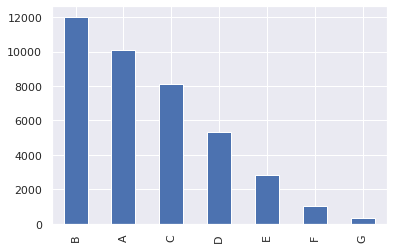

In [ ]:
print(df['grade'].value_counts(dropna=False,normalize=True),"\n")
df['grade'].value_counts(dropna=False).plot(kind='bar')

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


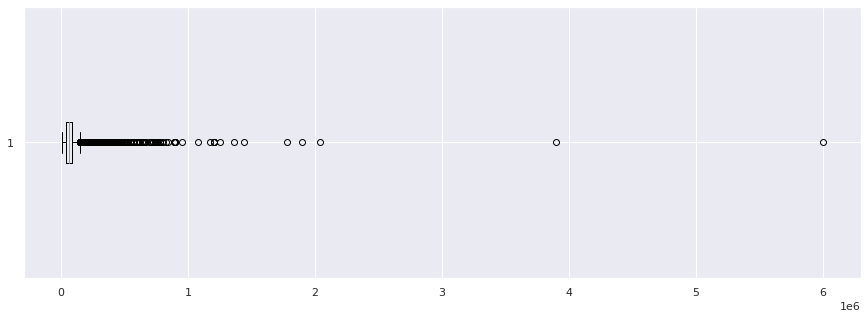

In [ ]:
print(df["annual_inc"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["annual_inc"],vert=False)
plt.show()

There are quite some outliers in annual income feature.

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


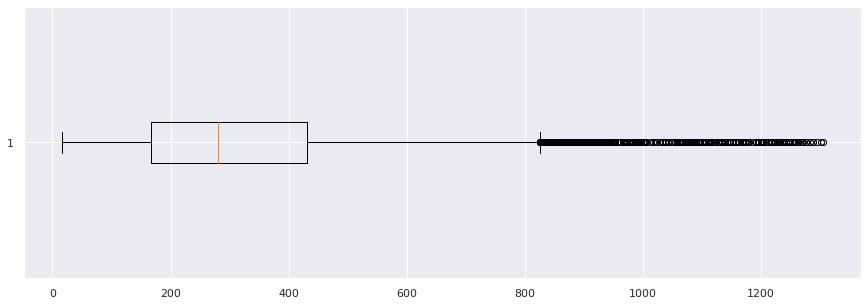

In [ ]:
print(df["installment"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["installment"],vert=False)
plt.show()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


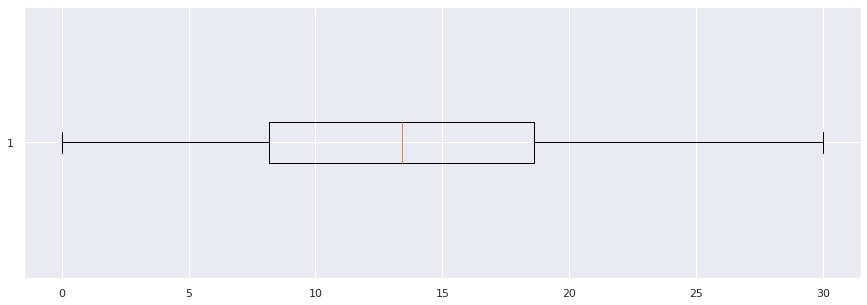

In [ ]:
print(df["dti"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["dti"],vert=False)
plt.show()

No outliers in the dti ratio

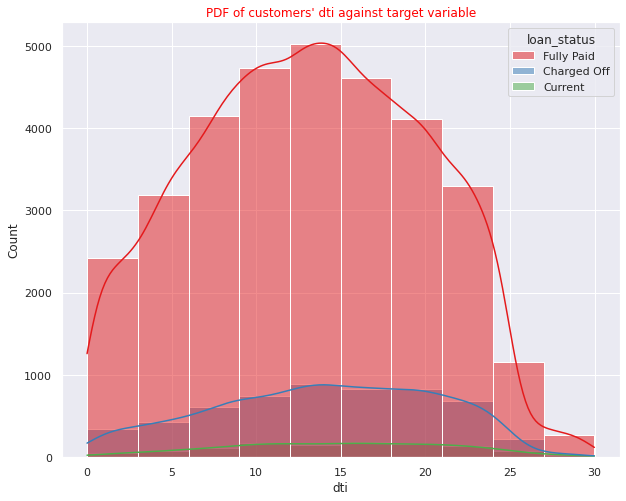

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='dti', kde=True, hue='loan_status', palette='Set1', bins=10)
plt.title("PDF of customers' dti against target variable", fontsize=12, color='Red')
plt.show()

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


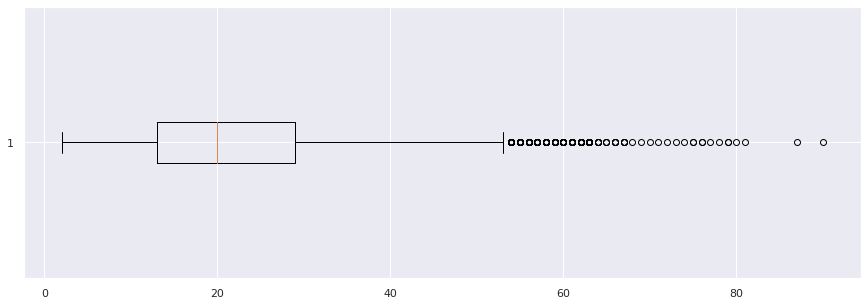

In [ ]:
print(df["total_acc"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["total_acc"],vert=False)
plt.show()

There are some outliers in total accounts feature, which we might get some insight when plotted against target variable.

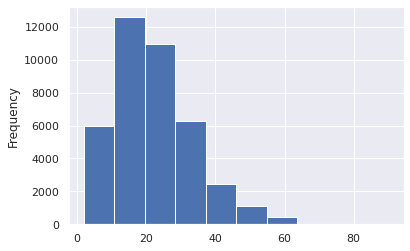

In [ ]:
df["total_acc"].plot(kind='hist')

# **Bivariate Analysis**

In [ ]:
# Installing and loading the library
!pip install dabl

import dabl

Target looks like classification
Linear Discriminant Analysis training set score: 0.409


[[<Figure size 1152x648 with 12 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

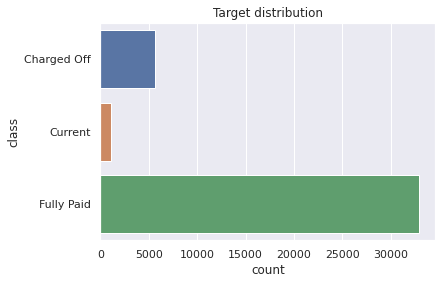

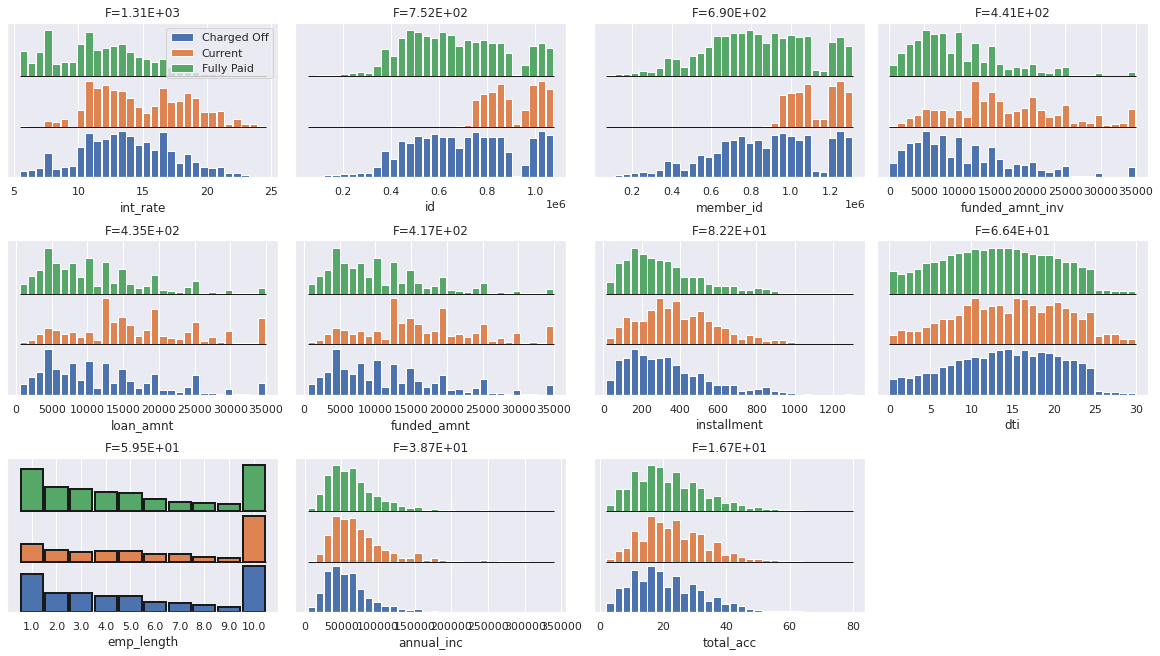

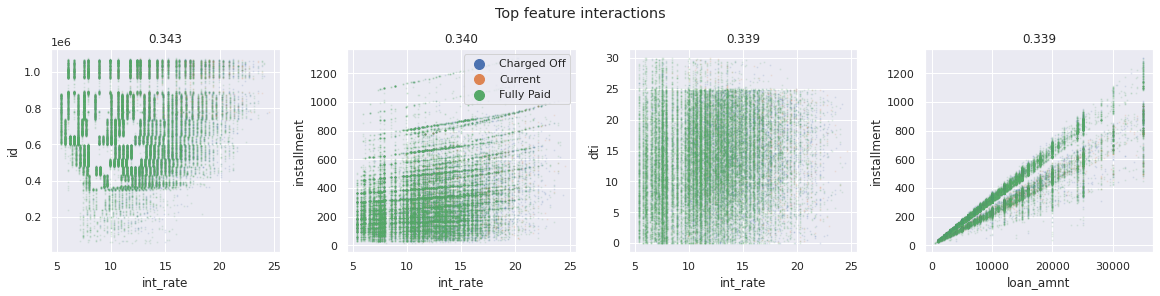

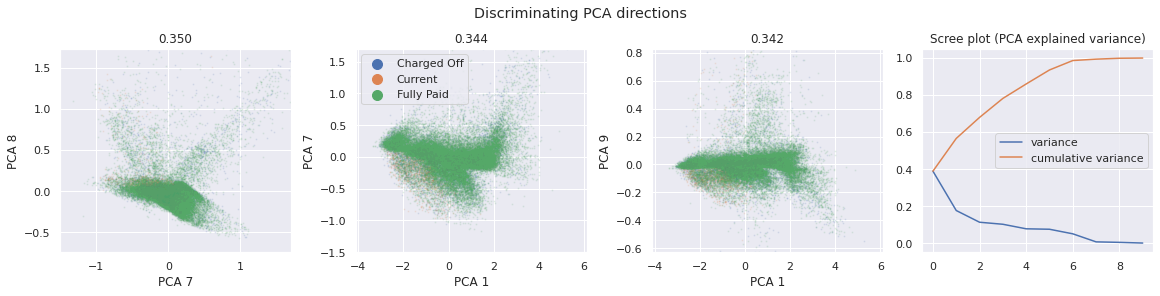

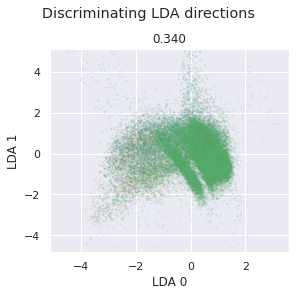

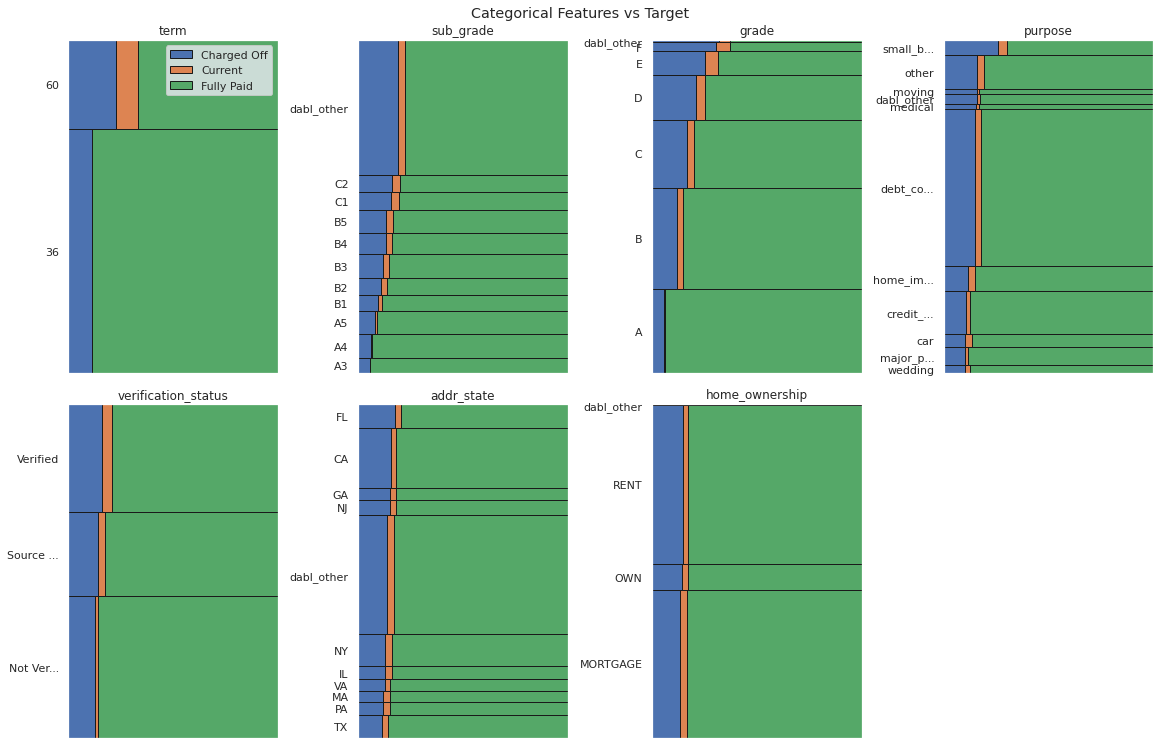

In [ ]:
dabl.plot(df, target_col="loan_status")

**Observations on major default possibilities:**

**Quantitative variables-** 

1. with loans of interest rate 10-17%
2. with funded amount of 10000 or less.
3. with emp_length of either 1year or 10+ years
4. with annual income of 50k-100k, outliers don't seem to have defaulted
5. similarly, total number of accounts with 10-30, outliers don't seem to have defaulted


**Categorical variables-**

1. with loans of term 60 months has seen higher defaults than 36 months
2. it's evident that as the grade increases, the default cases have increased too.
3. small businesses have seen higher defaults than any other loan purpose